<a href="https://colab.research.google.com/github/kanjaf/-kanjaf-.github.io/blob/master/Energy_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#we begin by importing the general libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

Exploratory Data Analysis

In [ ]:
energy = pd.read_csv('/content/test_energy_data.csv')

In [ ]:
#let's view the first couple of lines
energy.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59


In [ ]:
#aboutthecsv
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    object 
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 non-null    int64  
 3   Appliances Used      100 non-null    int64  
 4   Average Temperature  100 non-null    float64
 5   Day of Week          100 non-null    object 
 6   Energy Consumption   100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


In [ ]:
#look at the shape of the data to know the number of rows and columns
energy.shape

(100, 7)

There are 100 columns and 7 rows.

In [ ]:
#check for any null values in the data set
energy.isna().sum()

,0
building_type,0
square_footage,0
num_occupants,0
appliances_used,0
avg_temperature,0
day_of_week,0
energy_consumption,0


There are no null values, and the data types seem to be correct. Therefore, minimal data cleaning.

In [ ]:
# Summary statistics for numeric columns
print(energy.describe())

       Square Footage  Number of Occupants  Appliances Used  \
count      100.000000           100.000000       100.000000   
mean     25881.920000            47.230000        26.970000   
std      13711.075264            29.905526        14.237846   
min       1161.000000             2.000000         1.000000   
25%      14161.000000            21.000000        16.750000   
50%      27582.500000            47.000000        27.500000   
75%      38109.500000            73.000000        39.250000   
max      49354.000000            99.000000        49.000000   

       Average Temperature  Energy Consumption  
count           100.000000           100.00000  
mean             22.043300          4187.57830  
std               6.957951           832.55985  
min              10.400000          2351.97000  
25%              15.682500          3621.92500  
50%              21.970000          4249.39000  
75%              27.492500          4797.17500  
max              34.710000          6042

In [ ]:
# Rename columns to code-friendly names
energy.rename(columns={
    'Building Type': 'building_type',
    'Square Footage': 'square_footage',
    'Number of Occupants': 'num_occupants',
    'Appliances Used': 'appliances_used',
    'Average Temperature': 'avg_temperature',
    'Day of Week': 'day_of_week',
    'Energy Consumption': 'energy_consumption'
}, inplace=True)

# Check new column names
print(energy.columns)


Index(['building_type', 'square_footage', 'num_occupants', 'appliances_used',
       'avg_temperature', 'day_of_week', 'energy_consumption'],
      dtype='object')


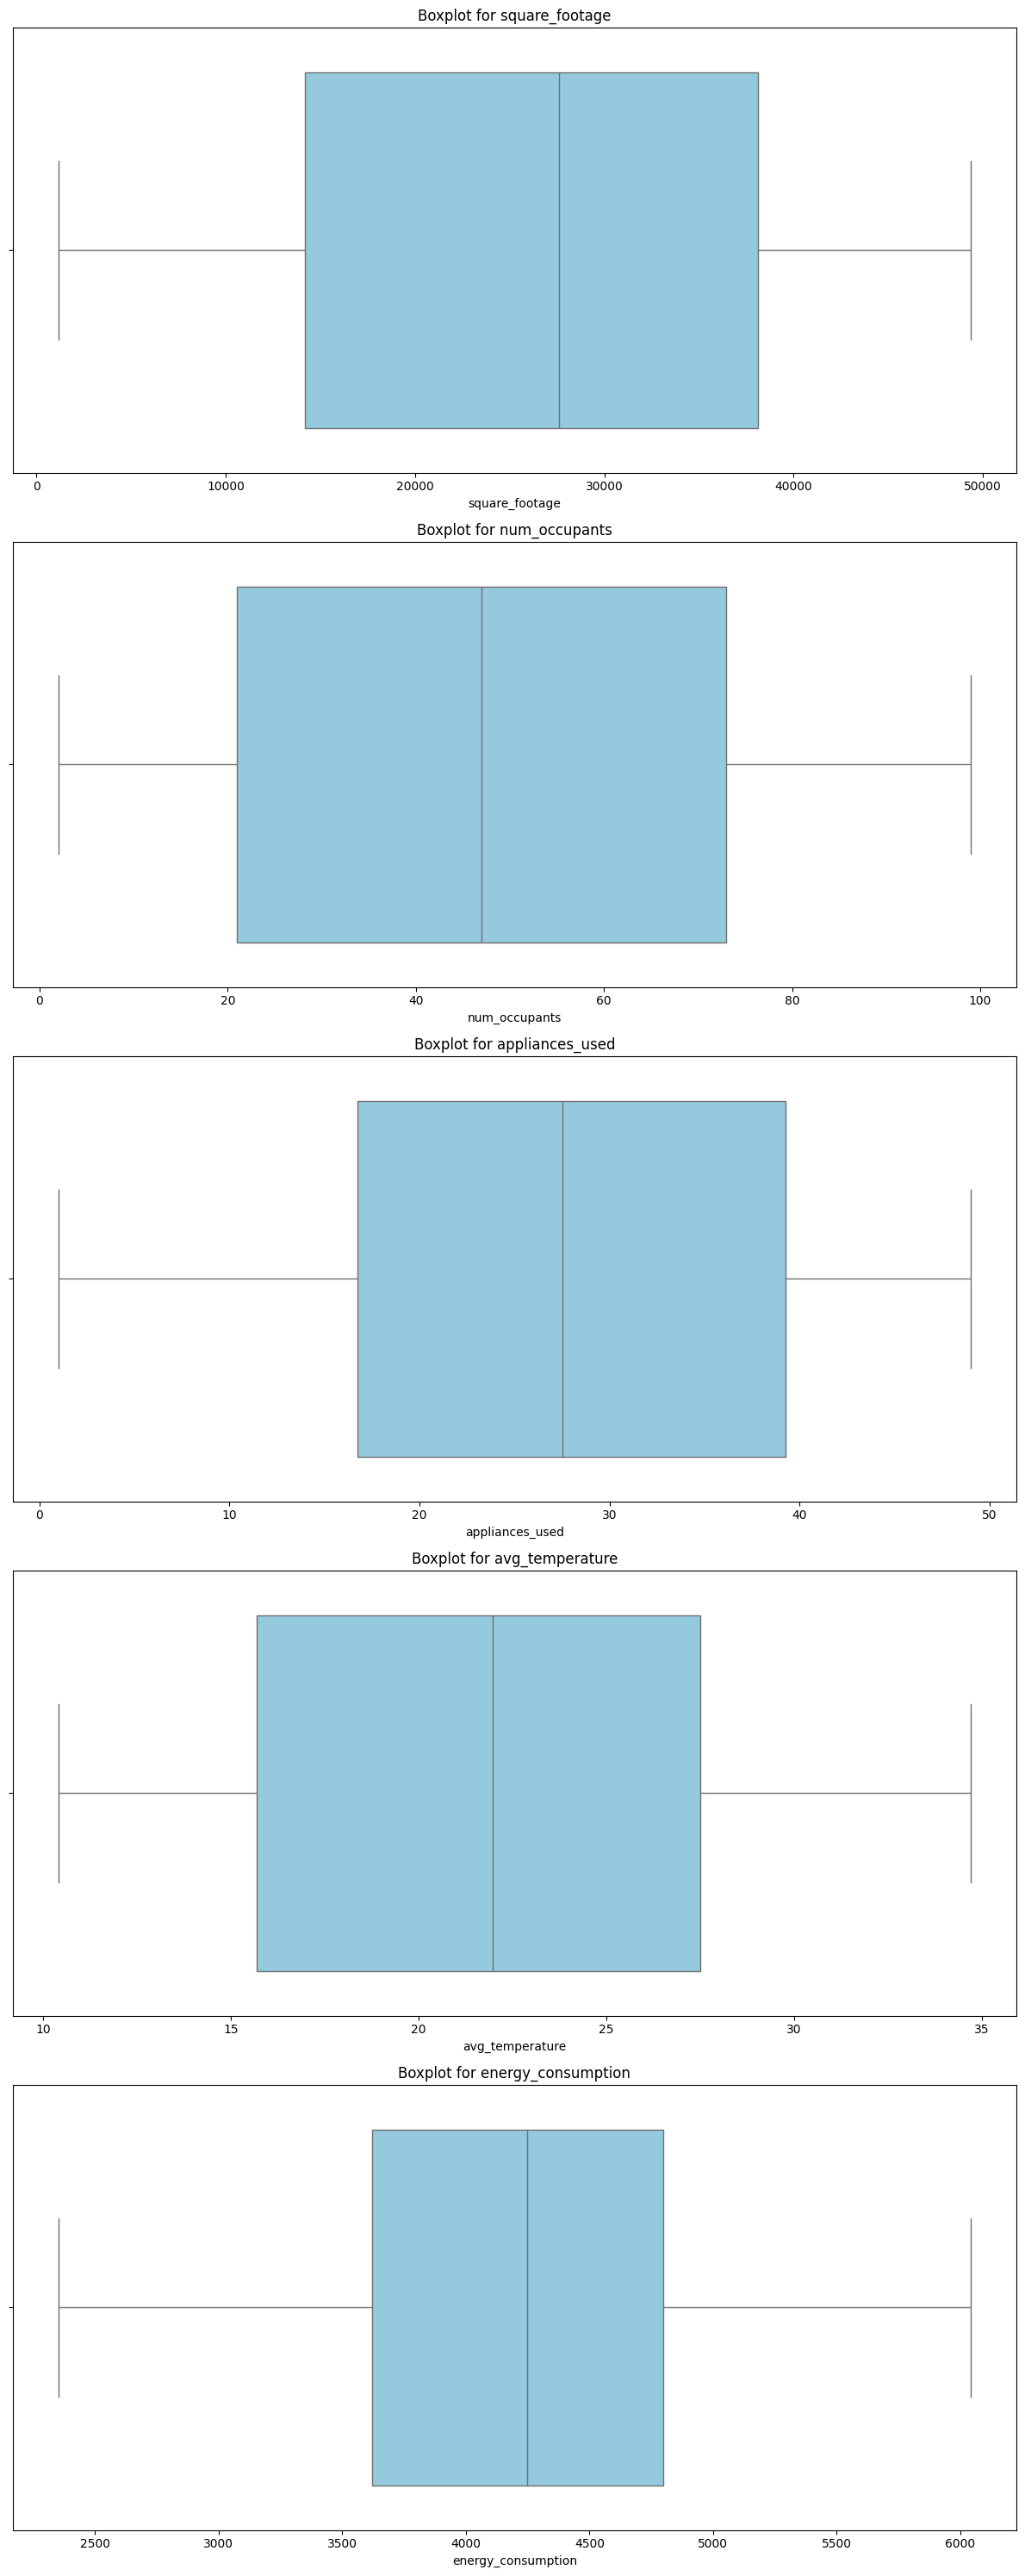

In [ ]:
# Select numerical columns
num_cols = energy.select_dtypes(include='number').columns

# Set up the figure
plt.figure(figsize=(12, 6 * len(num_cols)))

# Loop through each numerical column
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(data=energy, x=col, color='skyblue')
    plt.title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()


There are no outliers.

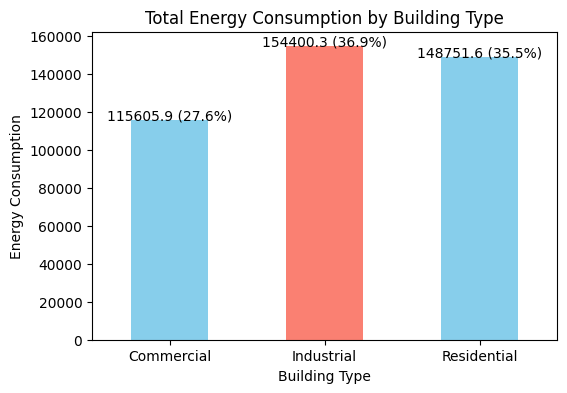

In [ ]:
# Aggregate total energy consumption by building type
consumption_by_type = energy.groupby('building_type')['energy_consumption'].sum()

# Bar chart
plt.figure(figsize=(6,4))
bars = consumption_by_type.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Total Energy Consumption by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=0)

# Add numbers on top of bars
total = consumption_by_type.sum()
for i, val in enumerate(consumption_by_type):
    plt.text(i, val + 0.5, f'{val:.1f} ({val/total*100:.1f}%)', ha='center')

plt.show()



As you can see there is an almost equal distribution of energy consumption but industrial type takes the lead.

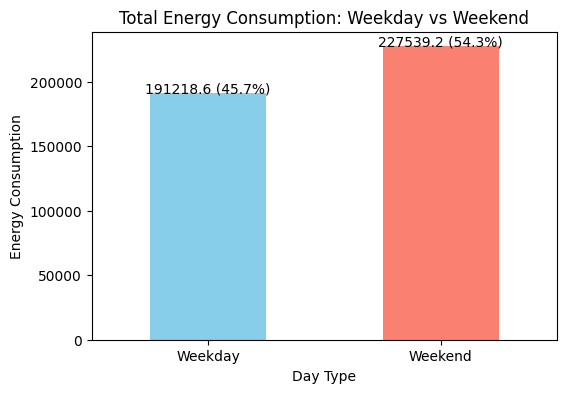

In [ ]:
# Aggregate total energy consumption by weekday/weekend
consumption_by_type = energy.groupby('day_of_week')['energy_consumption'].sum()

# Bar chart
plt.figure(figsize=(6,4))
bars = consumption_by_type.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Total Energy Consumption: Weekday vs Weekend')
plt.xlabel('Day Type')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=0)

# Add numbers on top of bars
total = consumption_by_type.sum()
for i, val in enumerate(consumption_by_type):
    plt.text(i, val + 0.5, f'{val:.1f} ({val/total*100:.1f}%)', ha='center')

plt.show()


There is more energy consuption over the weekend than during the week.

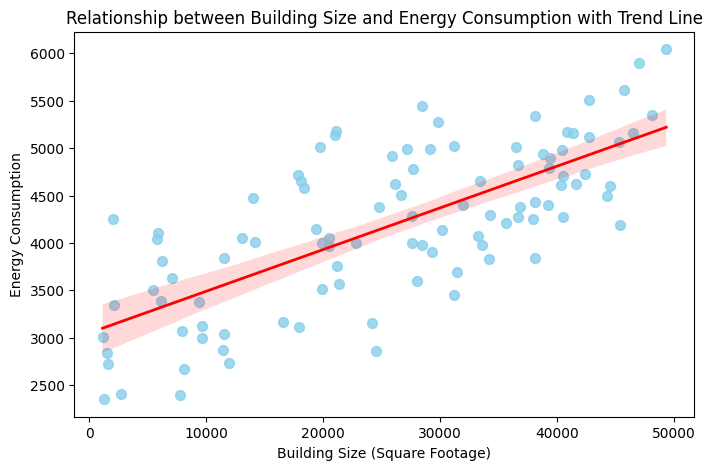

In [ ]:
plt.figure(figsize=(8,5))

# Scatter plot with regression line
sns.regplot(
    data=energy,
    x='square_footage',
    y='energy_consumption',
    scatter_kws={'color':'skyblue', 's':50},  # points style
    line_kws={'color':'red', 'linewidth':2}   # regression line style
)

# Labels and title
plt.xlabel('Building Size (Square Footage)')
plt.ylabel('Energy Consumption')
plt.title('Relationship between Building Size and Energy Consumption with Trend Line')

plt.show()


There seems to be an almost linear relationship between size of the house and energy consumption.

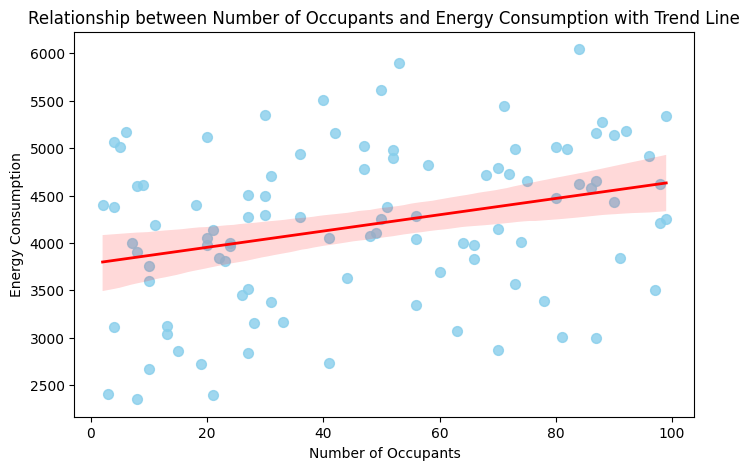

In [ ]:
plt.figure(figsize=(8,5))

# Scatter plot with regression line
sns.regplot(
    data=energy,
    x='num_occupants',
    y='energy_consumption',
    scatter_kws={'color':'skyblue', 's':50},  # points style
    line_kws={'color':'red', 'linewidth':2}   # regression line style
)

# Labels and title
plt.xlabel('Number of Occupants')
plt.ylabel('Energy Consumption')
plt.title('Relationship between Number of Occupants and Energy Consumption with Trend Line')

plt.show()

The relationship between number of occupants and energy consumotion is not linear.

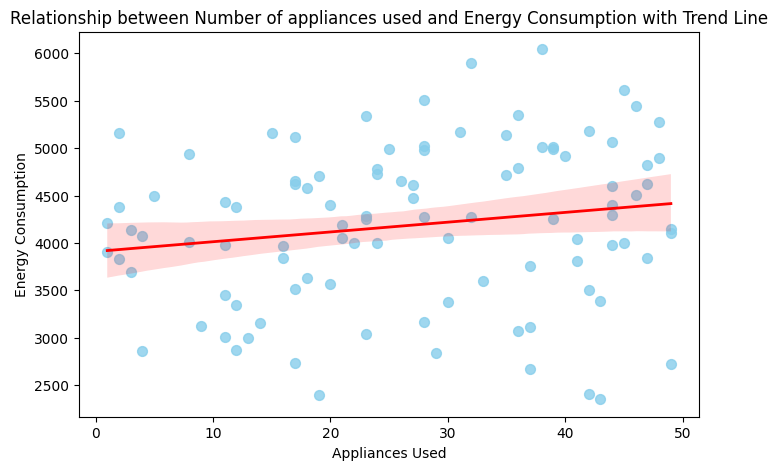

In [ ]:
plt.figure(figsize=(8,5))

# Scatter plot with regression line
sns.regplot(
    data=energy,
    x='appliances_used',
    y='energy_consumption',
    scatter_kws={'color':'skyblue', 's':50},  # points style
    line_kws={'color':'red', 'linewidth':2}   # regression line style
)

# Labels and title
plt.xlabel('Appliances Used')
plt.ylabel('Energy Consumption')
plt.title('Relationship between Number of appliances used and Energy Consumption with Trend Line')

plt.show()


The relationship between number of appliances and energy consumption is not linear.

                    square_footage  num_occupants  appliances_used  \
square_footage            1.000000      -0.080458        -0.145933   
num_occupants            -0.080458       1.000000         0.034320   
appliances_used          -0.145933       0.034320         1.000000   
avg_temperature           0.030612      -0.063608        -0.136386   
energy_consumption        0.724039       0.308594         0.176380   

                    avg_temperature  energy_consumption  
square_footage             0.030612            0.724039  
num_occupants             -0.063608            0.308594  
appliances_used           -0.136386            0.176380  
avg_temperature            1.000000           -0.079733  
energy_consumption        -0.079733            1.000000  


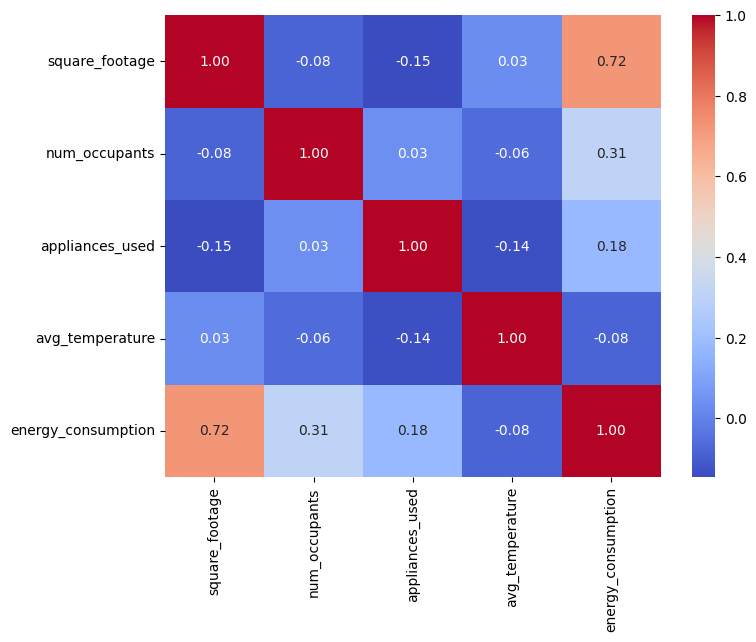

In [ ]:
numeric_cols = ['square_footage', 'num_occupants', 'appliances_used', 'avg_temperature', 'energy_consumption']
corr = energy[numeric_cols].corr()
print(corr)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()



There is a very strong positive correlation between square footage and energy consumption.

The rest are weak.

Linear Regression

In [ ]:
!git init


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [ ]:
!git add .



In [ ]:
!git commit -m "Initial commit from Colab"


Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@82bb3873fe34.(none)')


In [ ]:
!git config user.name "Kanja Farnadis"
!git config user.email "kanjamwingirwa@gmail.com"


In [ ]:
!git add .
!git commit -m "Initial commit from Colab"

[master (root-commit) ca812da] Initial commit from Colab
 22 files changed, 51160 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/default_configs.db
 create mode 100644 .config/gce
 create mode 100644 .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
 create mode 100644 .config/logs/2026.01.16/14.23.31.981136.log
 create mode 100644 .config/logs/2026.01.16/14.24.03.314209.log
 create mode 100644 .config/logs/2026.01.16/14.24.13.071214.log
 create mode 100644 .config/logs/2026.01.16/14.24.18.954466.log
 create mode 100644 .config/logs/2026.01.16/14.24.28.646070.log
 create mode 100644 .config/logs/2026.01.16/14.24.29.392089.log
 create mode 100755 sample_data/README.md
 creat

In [ ]:
# 4️⃣ Create main branch
!git branch -M main

# 5️⃣ Add GitHub remote
!git remote add origin https://github.com/kanjaf/Energy_Prediction_Model.git

# 6️⃣ Add all files
!git add .

# 7️⃣ Commit files
!git commit -m "Initial commit from Colab"

# 8️⃣ Push to GitHub
!git push -u origin main

On branch main
nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
https://github.com/kanjaf/Energy_Prrediction_Model

In [ ]:
# 4️⃣ Create main branch
!git branch -M main

# 5️⃣ Add GitHub remote
!git remote add origin https://github.com/kanjaf/Energy_Prediction_Model

# 6️⃣ Add all files
!git add .

# 7️⃣ Commit files
!git commit -m "Initial commit from Colab"

# 8️⃣ Push to GitHub
!git push -u origin main

error: remote origin already exists.
On branch main
nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
#we begin by feature encoding